# Linear Regression Using the Normal Equation

In [1]:
#The normal equation can be used to minimize the cost function for linear regression
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [2]:
#We can compute theta hat, the value of theta that minimizes the cost function, using the following code.
#We will use the inv() function to compute the inverse of a matrix, and the dot() function to compute
#the dot product between two matricies
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
#Notice how the equation we used to generate the data is y = 4 + 3x + Gaussian noise. So we would expect values close to 4 and 3
theta_best

array([[4.01315617],
       [2.94581621]])

In [7]:
#This is pretty damn close, the only reason it is not exact is due to the noise. We can now make predictions using theta hat
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.01315617],
       [9.90478859]])

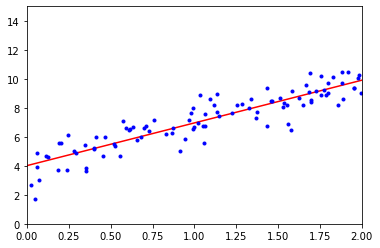

In [9]:
#Now we can plot the model's predictions
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
#Performing Linear Regression using Scikit-Learn is simple
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01315617]), array([[2.94581621]]))

In [11]:
lin_reg.predict(x_new)

array([[4.01315617],
       [9.90478859]])

In [12]:
#The function above computes theta hat = psuedoinverse(X) * y
#You can also calculate the psuedoinverse directly
np.linalg.pinv(x_b).dot(y)

array([[4.01315617],
       [2.94581621]])

# Batch Gradient Descent

In [13]:
#Let's implement gradient descent
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.01315617],
       [2.94581621]])

# Stochastic Gradient Descent

In [16]:
#Produced the same result as the normal equation

#Here we will implement stochastic gradient descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 10 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
#This provides a pretty good solution considering it only iterated over the training set 50 times, as opposed to batch gradient descent which
#would operate over every element in the training set (1000 iterations)
theta

array([[4.01184   ],
       [2.92652561]])

In [18]:
#To perform stochastic gradient descent with Scikit-Learn, you can use the SGDRegressor class. The following code will run for maximum 1000 epochs
#or until the loss drops by less than 0.001 per epoch (max_iter=1000, tol=1e-3). It starts with a learning rate of 0.1 (eta0=0.1)
#using the default learning schedule. Lastly, it does not use any regularization (penalty=None)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
#Once again you will find the solution is quite similar to the one returned by the Normal Equation
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98358303]), array([2.94219775]))

# Polynomial Regression

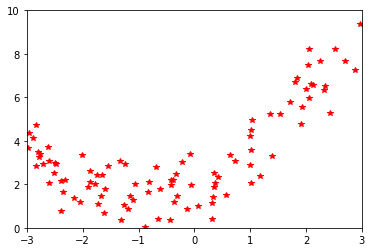

In [44]:
#We will now investigate polynomial regression. First, lets generate some nonlinear data
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, "r*")
plt.axis([-3, 3, 0, 10])
plt.show()

In [22]:
#Clearly a linear model will never fit this data properly. We can use Scikit-Learn's PolynomialFeatures class to transform
#our training data, adding the square (second degree polynomial) of each feature in the training set as a new feature (in this case,
#there is just one feature)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.91085622])

In [23]:
x_poly[0]

array([-0.91085622,  0.82965906])

In [25]:
#x_poly now contains the original feature of x plus the square of this feature. We can now fit a LinearRegression model to this
#extended training data
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.16166408]), array([[0.91990776, 0.44863226]]))

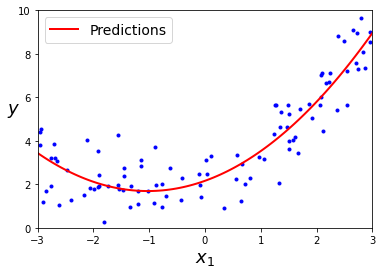

In [27]:
x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [36]:
#To test for overfitting, we can use learning curves. Here we will build a function to display learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)  
    

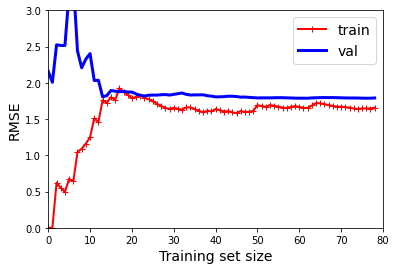

In [46]:
#Taking a look at learning curves for linear regression model
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)
plt.axis([0, 80, 0, 3]) 
plt.show()

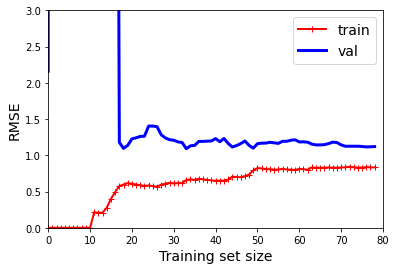

In [48]:
#That shows learning curves for underfitted models, which typically plateau close to eachother vertically and at a high RMSE.
#Let's look at an overfitted model now
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3]) 
plt.show()

In [49]:
#These learning curves look similar to the previous ones, with 2 differences. Firstly, the error on the training data is much lower than with linear
#regression. Second, there is a gap between the curves. This means that the model performs better on the training data than the validation
#data, which is the halmark of an overfittting model. The plateaus are converging though, which visualizes how a larger
#training set helps an overfitting model become more accurate.

# Regularized Models

In [51]:
#Ridge Regression with Scikit-Learn, using a closed form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.59397056]])

In [52]:
#And using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2") #Setting penalty to l2 just means use ridge regression
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.56366053])

In [53]:
#Here is Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])
#Note you could also use SGDRegressor(penalty="l1")

array([4.53593064])

In [55]:
#Here is Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1 ratio corresponds to the mix ratio, r
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([4.5438607])

In [61]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

x_train, x_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [62]:
#Basic implementation of early stopping
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

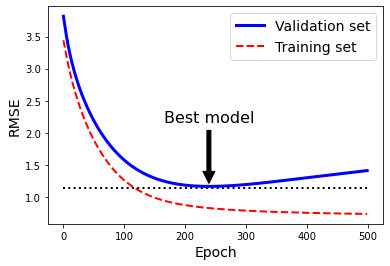

In [65]:
#Generate a graph
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(x_train_poly_scaled)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Logistic Regression

In [66]:
#Using the famous Iris dataset, let's first try to detect the Iris cirginica type based only on th epetal width feature.
#First let's load the data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [67]:
x = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris virginica, else 0

In [68]:
#Now let's train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

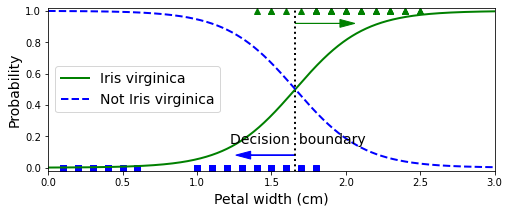

In [72]:
#Let's look at the model's estimated probabilities for flowers with pedal widths varying from 0 to 3 cm
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(x_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [73]:
#The Iris virginica flowers have petal widths that range from 1.4cm to 2.5cm, while other iris flowers have petal widths ranging from 0.1cm to 1.8cm.
#There is some overlap. Above 2cm, the model is confident that the flower is Iris virginica, while below 1cm, the model is confident that
#the flower is another iris. Between these extremes, the classifier is unsure. However, if you ask it to predict with the predict() method rather
#than the predict_proba() method, it will return whatever dclass is most likely. There is a decision boundry at around 1.6cm, where
#both probabilities are equal to 50%. If the petal width is greater than 1.6, the classifier will predict Iris virginica, less than 1.6 it will
#predict Not Iris virginica
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [76]:
#Soft max model to classify iris flowers into all 3 classes
x = iris["data"][:, (2, 3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(x, y)
softmax_reg.predict([[5, 2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

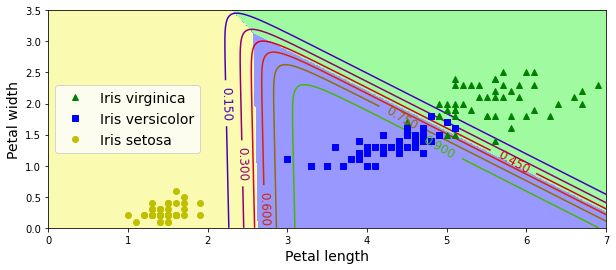

In [81]:
#Decision boundaries
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()